In [1]:
import os

folders = ['evaluation_reports', 'diagnostic_reports', 'models', 'tables']
for folder in folders:
  if not os.path.isdir(folder):
    os.mkdir(folder)

In [2]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using 

In [3]:
import sdv
from sdv.datasets.demo import get_available_demos, download_demo
from sdv.metadata import MultiTableMetadata
from sdv.multi_table import HMASynthesizer
from sdv.evaluation.multi_table import run_diagnostic, evaluate_quality

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
get_available_demos('multi_table')

,dataset_name,size_MB,num_tables
0,Accidents_v1,219.33,3
1,Atherosclerosis_v1,6.62,4
2,AustralianFootball_v1,31.18,4
3,Biodegradability_v1,0.57,5
4,Bupa_v1,0.04,9
5,CORA_v1,1.79,3
6,Carcinogenesis_v1,0.94,6
7,Chess_v1,0.25,2
8,Countries_v1,9.93,4
9,DCG_v1,0.25,2


In [5]:
dataset = 'fake_hotels'
df, metadata = download_demo(modality='multi_table', dataset_name=dataset)

In [6]:
print(df.keys())

dict_keys(['hotels', 'guests'])


In [7]:
tab1 = 'hotels'
tab2 = 'guests'

tab1_df=df[tab1]
tab2_df=df[tab2]

tab1_df.to_csv('tables/'+tab1+'.csv')
tab2_df.to_csv('tables/'+tab2+'.csv')

In [8]:
from google.colab import files

# files.download('tables/'+tab1+'.csv')
# files.download('tables/'+tab2+'.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
tab1_df.head()

,hotel_id,city,state,rating,classification
0,HID_000,Boston,Massachusetts,4.8,RESORT
1,HID_001,Boston,Massachuesetts,4.1,CHAIN
2,HID_002,San Francisco,California,3.8,MOTEL
3,HID_003,San Francisco,California,4.0,CHAIN
4,HID_004,New York City,New York,3.7,MOTEL


In [10]:
tab2_df.head()

,guest_email,hotel_id,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,awolf@phillips.com,HID_000,False,BASIC,37.89,27 Dec 2020,28 Dec 2020,156.23,"993 Rebecca Landing\nJesseburgh, PA 05072",4075084747483975747
1,tonya44@wilkinson-wilkins.com,HID_000,False,BASIC,24.37,30 Dec 2020,31 Dec 2020,139.43,"958 Beverly Bypass\nSouth Ronald, GA 46368",180072822063468
2,harriskathleen@goodwin.com,HID_000,True,DELUXE,0.00,17 Sep 2020,19 Sep 2020,403.33,"8302 Nathaniel Pike\nRileyland, TX 71613",38983476971380
3,kayladiaz@wallace-simmons.com,HID_000,False,BASIC,NaN,28 Dec 2020,30 Dec 2020,140.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,paigemendoza@tran-martin.com,HID_000,True,DELUXE,0.00,05 Apr 2020,10 Apr 2020,197.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


In [11]:
tab1_df.shape, tab2_df.shape

((10, 5), (658, 10))

In [12]:
metadata = MultiTableMetadata()
metadata.detect_from_dataframes(df)

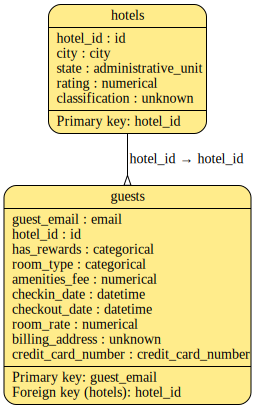

In [13]:
metadata.visualize(
    show_table_details='full',
    show_relationship_labels=True,
    output_filepath='my_metadata.png'
)

        rating
rating     1.0


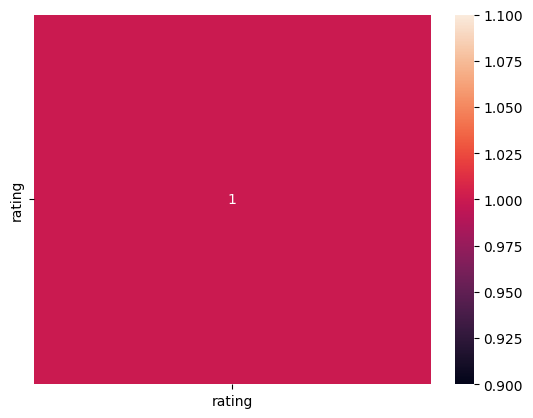

                    amenities_fee  room_rate  credit_card_number
amenities_fee            1.000000  -0.068846            0.097411
room_rate               -0.068846   1.000000           -0.070843
credit_card_number       0.097411  -0.070843            1.000000


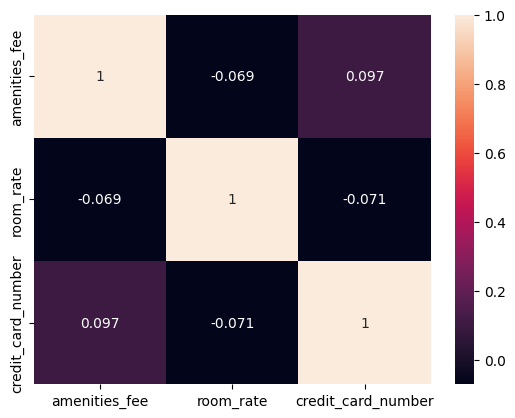

In [17]:
numeric_cols1 = tab1_df.select_dtypes(include=[int, float]).columns
numeric_cols2 = tab2_df.select_dtypes(include=[int, float]).columns

if len(numeric_cols1):
  numeric_df = tab1_df[numeric_cols1]
  corr_mat = numeric_df.corr()
  print(corr_mat)
  sns.heatmap(corr_mat, cmap='rocket', annot=True)
  plt.show()

if len(numeric_cols2):
  numeric_df = tab2_df[numeric_cols2]
  corr_mat = numeric_df.corr()
  print(corr_mat)
  sns.heatmap(corr_mat, cmap='rocket', annot=True)

In [18]:
syn = HMASynthesizer(metadata)
syn.fit(df)
syn.save('models/' + dataset + '.pkl')

/usr/local/lib/python3.10/dist-packages/sdv/multi_table/base.py:81: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Preprocess Tables:  50%|█████     | 1/2 [00:00<00:00,  3.89it/s]/usr/local/lib/python3.10/dist-packages/rdt/transformers/pii/anonymizer.py:118: FutureWarning: The 'enforce_uniqueness' parameter is no longer supported. Please use the 'cardinality_rule' parameter instead.
  warnings.warn(
Preprocess Tables: 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]



Learning relationships:


(1/1) Tables 'hotels' and 'guests' ('hotel_id'): 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


Modeling Tables: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


In [19]:
d1 = syn.sample(scale=1)

In [20]:
tab1_syn = d1[tab1]
tab2_syn = d1[tab2]

        rating
rating     1.0


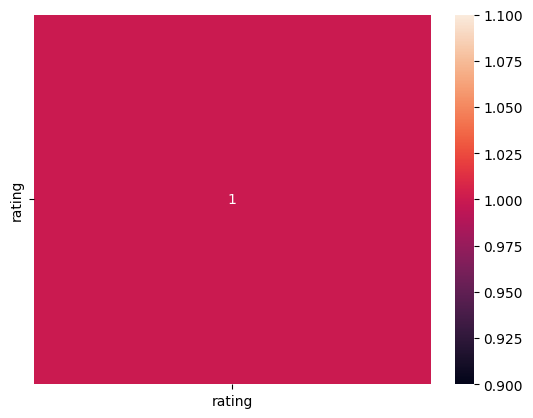

                    amenities_fee  room_rate  credit_card_number
amenities_fee            1.000000   0.199136            0.002442
room_rate                0.199136   1.000000            0.030447
credit_card_number       0.002442   0.030447            1.000000


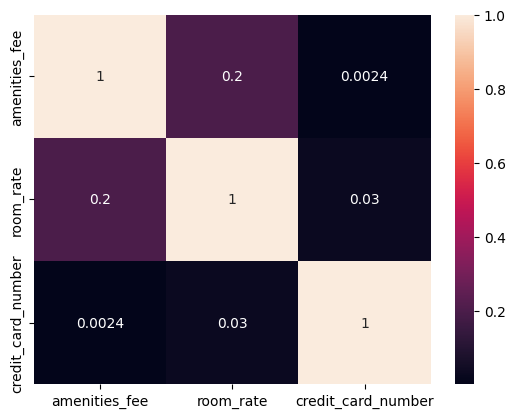

In [21]:
numeric_cols1 = tab1_syn.select_dtypes(include=[int, float]).columns
numeric_cols2 = tab2_syn.select_dtypes(include=[int, float]).columns

if len(numeric_cols1):
  numeric_df = tab1_syn[numeric_cols1]
  corr_mat = numeric_df.corr()
  print(corr_mat)
  sns.heatmap(corr_mat, cmap='rocket', annot=True)
  plt.show()

if len(numeric_cols2):
  numeric_df = tab2_syn[numeric_cols2]
  corr_mat = numeric_df.corr()
  print(corr_mat)
  sns.heatmap(corr_mat, cmap='rocket', annot=True)

In [22]:
diagnostic_report = run_diagnostic(df, d1, metadata)
diagnostic_report.save('diagnostic_reports/'+dataset+'_diag.pkl')

Generating report ...

(1/3) Evaluating Data Validity: |██████████| 15/15 [00:00<00:00, 615.17it/s]|
Data Validity Score: 100.0%

(2/3) Evaluating Data Structure: |██████████| 2/2 [00:00<00:00, 163.66it/s]|
Data Structure Score: 100.0%

(3/3) Evaluating Relationship Validity: |██████████| 1/1 [00:00<00:00, 76.47it/s]|
Relationship Validity Score: 100.0%

Overall Score (Average): 100.0%



In [23]:
diagnostic_report.get_details(property_name='Data Validity')

,Table,Column,Metric,Score
0,hotels,hotel_id,KeyUniqueness,1.0
1,hotels,rating,BoundaryAdherence,1.0
2,guests,guest_email,KeyUniqueness,1.0
3,guests,has_rewards,CategoryAdherence,1.0
4,guests,room_type,CategoryAdherence,1.0
5,guests,amenities_fee,BoundaryAdherence,1.0
6,guests,checkin_date,BoundaryAdherence,1.0
7,guests,checkout_date,BoundaryAdherence,1.0
8,guests,room_rate,BoundaryAdherence,1.0


In [24]:
quality_report = evaluate_quality(df, d1, metadata)
quality_report.save('evaluation_reports/'+dataset+'_eval.pkl')

Generating report ...

(1/4) Evaluating Column Shapes: |██████████| 15/15 [00:00<00:00, 686.71it/s]|
Column Shapes Score: 85.09%

(2/4) Evaluating Column Pair Trends: |██████████| 55/55 [00:00<00:00, 182.38it/s]|
Column Pair Trends Score: 83.74%

(3/4) Evaluating Cardinality: |██████████| 1/1 [00:00<00:00, 44.27it/s]|
Cardinality Score: 60.0%

(4/4) Evaluating Intertable Trends: |██████████| 50/50 [00:00<00:00, 431.91it/s]|
Intertable Trends Score: 85.65%

Overall Score (Average): 78.62%



In [28]:
from sdv.evaluation.multi_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=df,
    synthetic_data=d1,
    metadata=metadata,
    table_name='guests',
    column_names=['room_rate', 'room_type'],
    )

fig.show()

In [25]:
from google.colab import files

for folder in folders:
  filess = os.listdir(folder)
  for f in filess:
      if f.endswith('.pkl') or f.endswith('.csv'):
          print(f)
          # files.download(os.path.join(folder, f))

fake_hotels_eval.pkl
fake_hotels_diag.pkl
fake_hotels.pkl
hotels.csv
guests.csv


In [ ]:
for folder in folders:
  filess = os.listdir(folder)
  for f in filess:
      # os.remove(os.path.join(folder, f))